In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB as gnb
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv("C:\\Users\\RAHUL\\Downloads\\heart.csv")

In [3]:
type(ds)

pandas.core.frame.DataFrame

In [4]:
ds.shape

(918, 12)

In [5]:
ds.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,3,130,283,0,3,98,0,0.0,2,0
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
ds.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,4,110,264,0,1,132,0,1.2,1,1
914,68,1,1,144,193,1,1,141,0,3.4,1,1
915,57,1,1,130,131,0,1,115,1,1.2,1,1
916,57,0,3,130,236,0,2,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [7]:
ds.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.748366,132.396514,198.799564,0.233115,1.592593,136.809368,0.404139,0.887364,1.567538,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [9]:
inf = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment"]
for i in range(len(inf)):
    print(ds.columns[i]+":\t\t\t"+inf[i])

Age:			age
Sex:			1: male, 0: female
ChestPainType:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
RestingBP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FastingBS:			fasting blood sugar > 120 mg/dl
RestingECG:			resting electrocardiographic results (values 0,1,2)
MaxHR:			 maximum heart rate achieved
ExerciseAngina:			exercise induced angina
Oldpeak:			oldpeak = ST depression induced by exercise relative to rest
ST_Slope:			the slope of the peak exercise ST segment


In [10]:
ds["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [11]:
print(ds.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease      1.000000
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.403951
MaxHR             0.400421
ST_Slope          0.397802
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingECG        0.107628
RestingBP         0.107589
Name: HeartDisease, dtype: float64


1    508
0    410
Name: HeartDisease, dtype: int64


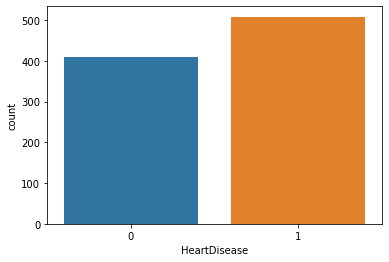

In [12]:
y = ds["HeartDisease"]
sns.countplot(y)
tartemp = ds.HeartDisease.value_counts()
print(tartemp)

In [13]:
print("Percentage of patience without cardiovascular problems: "+str(round(tartemp[0]*100/303,2)))
print("Percentage of patience with cardiovascular problems: "+str(round(tartemp[1]*100/303,2)))

Percentage of patience without cardiovascular problems: 135.31
Percentage of patience with cardiovascular problems: 167.66


In [14]:
ds["Sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

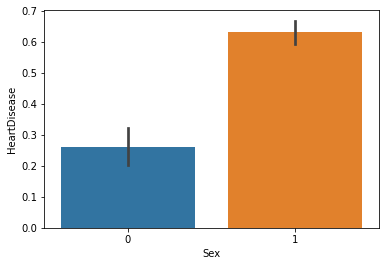

In [15]:
sns.barplot(ds["Sex"],y)

In [16]:
ds["ChestPainType"].unique()

array([3, 2, 1, 4], dtype=int64)

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

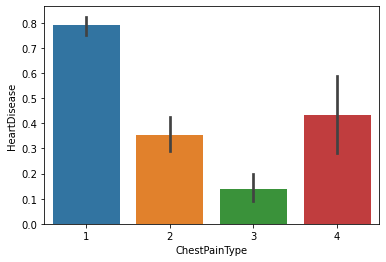

In [17]:
sns.barplot(ds["ChestPainType"],y)

In [18]:
ds["FastingBS"].describe()

count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

In [19]:
ds["FastingBS"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

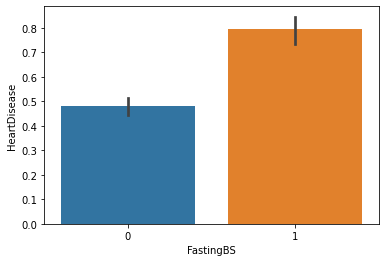

In [20]:
sns.barplot(ds["FastingBS"],y)

In [21]:
ds["RestingECG"].unique()

array([1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

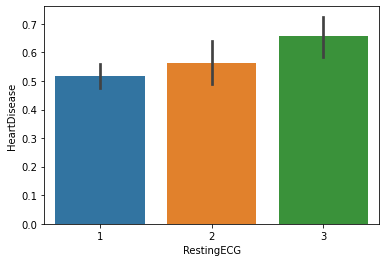

In [22]:
sns.barplot(ds["RestingECG"],y)

In [23]:
ds["ExerciseAngina"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

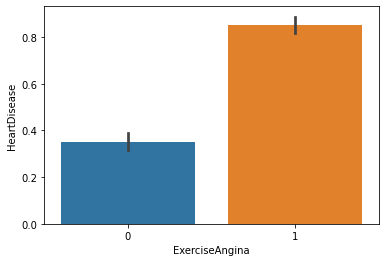

In [24]:
sns.barplot(ds["ExerciseAngina"],y)

In [25]:
ds["ST_Slope"].unique()

array([2, 1, 3], dtype=int64)

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

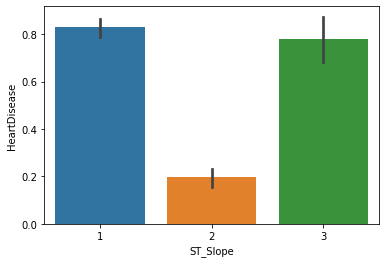

In [26]:
sns.barplot(ds["ST_Slope"],y)

In [27]:
predictors = ds.drop("HeartDisease",axis=1)
target = ds["HeartDisease"]
x_train,x_test,y_train,y_test = tts(predictors,target,test_size=0.25,random_state=0)

In [28]:
x_train.shape

(688, 11)

In [29]:
x_test.shape

(230, 11)

In [30]:
y_train.shape

(688,)

In [31]:
y_test.shape

(230,)

In [32]:
nb = gnb()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [33]:
y_pred_nb.shape

(230,)

In [34]:
nbscore = round(acc(y_pred_nb,y_test)*100,2)
print("The accuracy score using Naive Bayes is: "+str(nbscore)+" %")

The accuracy score using Naive Bayes is: 84.78 %


In [37]:
print(cr(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        92
           1       0.87      0.88      0.87       138

    accuracy                           0.85       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230

